In [1]:
import numpy as np
import pandas as pd
import requests
import time
from bs4 import BeautifulSoup as bs
from selenium import webdriver

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import tqdm
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from xgboost import XGBClassifier

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
from datetime import datetime, timedelta

In [3]:
# !pip install requests
# !pip install bs4
# !pip install selenium
# !pip install xgboost
# !pip install statsmodel

###  네이버 입욕제 판매량이 가장 많은 샵에서 향 인기 순위 크롤링

In [4]:
# url = "https://smartstore.naver.com/arviang/products/2823278938?NaPm=ct%3Dkadmt2z4%7Cci%3D847dc18a7fcd13a0689430f79eb585001e68d62d%7Ctr%3Dslsl%7Csn%3D343371%7Cic%3D%7Chk%3D626c67193a87cd142920b355d75c2aedf6add486#revw"

# options = webdriver.ChromeOptions()
# options.add_argument("headless")
# options.add_argument("window-size=1920x1080")

# driver = webdriver.Chrome()
# driver.get(url)

# soup = bs(driver.page_source, "html.parser")

In [5]:
# bath_bomb_type = []
# bath_bomb_smell = []

# path = ''

# for k in range(1, 85):
#     if (k == 1):
#         idx = 1
#         idx2 = 11
#     else:
#         idx = 3
#         idx2 = 12
#     for j in range(idx, idx2):
#         for i in range(0, len(smell_li)):
#             smell_li[i] = str(smell_li[i]).replace('<p class="text_info text_option">옵션 : 선택1: ', '')
#             smell_li[i] = str(smell_li[i]).replace('선택2: ', '')
#             smell_li[i] = str(smell_li[i]).replace('</p>', '')
#             bath_bomb_type.append(smell_li[i].split('/')[0].strip())
#             bath_bomb_smell.append(smell_li[i].split('/')[1].strip())
#             #print(smell_li[i].split('/')[1].strip()) 
            
#         path = '//*[@id="area_review_list"]/div[4]/a[' + str(j) + ']'
#         driver.find_element(By.XPATH, path).click()
#         soup = bs(driver.page_source, "html.parser")
#         smell_li = soup.find_all('p', class_='text_info text_option')
#         time.sleep(2)
               
            
#     if (k == 1):
#         path = '//*[@id="area_review_list"]/div[4]/a[' + str(11) + ']'
#         driver.find_element(By.XPATH, path).click()
#     else:
#         path = '//*[@id="area_review_list"]/div[4]/a[' + str(12) + ']'
#         driver.find_element(By.XPATH, path).click()
        
#     time.sleep(3)

In [6]:
# result = pd.Series(bath_bomb_smell).value_counts()

In [7]:
# result = pd.DataFrame(result)
# result.to_csv('입욕제 인기순위.csv', encoding='EUC-KR')

In [24]:
shower_data = pd.read_csv('./data/shower.csv', encoding='euc-kr')
shower_data.head()

,s_date,s_gender,s_age,s_temp,s_start,s_during,s_end,s_perfume,s_job,s_weather
0,2020-04-17,남,12,cold,16,10,16:10,무,학생,16
1,2020-04-14,남,12,hot,17,10,17:10,무,학생,20
2,2020-04-14,남,13,cold,17,15,17:15,무,학생,20
3,2020-04-17,남,14,hot,21,10,21:10,무,학생,14
4,2020-04-04,남,14,cold,17,20,17:20,무,학생,11


In [25]:
# 남, 여 각각 0과 1로 변경
shower_data.loc[shower_data['s_gender']=='남', 's_gender'] = 0
shower_data.loc[shower_data['s_gender']=='여', 's_gender'] = 1
#shower_data.head()

# 입욕제 유무를 숫자로 변경
shower_data.loc[shower_data['s_perfume']=='무', 's_perfume'] = 0
shower_data.loc[shower_data['s_perfume']=='유', 's_perfume'] = 1
#shower_data.head()

# 온도를 숫자로 변경
shower_data.loc[shower_data['s_temp']=='cold', 's_temp'] = 0
shower_data.loc[shower_data['s_temp']=='nomal', 's_temp'] = 1
shower_data.loc[shower_data['s_temp']=='hot', 's_temp'] = 2
#shower_data.head()

shower_data['s_gender'] = pd.to_numeric(shower_data['s_gender'])
shower_data['s_perfume'] = pd.to_numeric(shower_data['s_perfume'])

In [26]:
shower_data = pd.concat([shower_data, pd.get_dummies(shower_data['s_job'], prefix='직업')], axis=1)
shower_data.head()

,s_date,s_gender,s_age,s_temp,s_start,s_during,s_end,s_perfume,s_job,s_weather,...,직업_농업,직업_무직,직업_서비스업,직업_연구원,직업_자영업자,직업_주부,직업_학생,직업_한의사,직업_회계사,직업_회사원
0,2020-04-17,0,12,0,16,10,16:10,0,학생,16,...,0,0,0,0,0,0,1,0,0,0
1,2020-04-14,0,12,2,17,10,17:10,0,학생,20,...,0,0,0,0,0,0,1,0,0,0
2,2020-04-14,0,13,0,17,15,17:15,0,학생,20,...,0,0,0,0,0,0,1,0,0,0
3,2020-04-17,0,14,2,21,10,21:10,0,학생,14,...,0,0,0,0,0,0,1,0,0,0
4,2020-04-04,0,14,0,17,20,17:20,0,학생,11,...,0,0,0,0,0,0,1,0,0,0


In [27]:
x = pd.concat([shower_data['s_weather'], shower_data['s_gender'],shower_data['s_age'], pd.get_dummies(shower_data['s_job'], prefix='직업'), pd.get_dummies(shower_data['s_temp'], prefix='온도')], axis=1)
y = shower_data['s_start']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=44)
print("x_train : {}, x_test : {}, y_train : {}, y_test : {}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))
model = XGBClassifier()
model.fit(x_train, y_train)

print("train socre : {}".format(model.score(x_train, y_train)))
print("test socre : {}".format(model.score(x_test, y_test)))
#print("컬럼들의 중요도 : {}".format(model.feature_importances_.sort()))

print(metrics.classification_report(y_test, model.predict(x_test))) # 정밀도, 재현율, f1 스코어, 서포트를 알려준다.

#model.predict(x2.iloc[:40,])

x_train : (776, 20), x_test : (333, 20), y_train : (776,), y_test : (333,)
train socre : 0.8414948453608248
test socre : 0.3963963963963964
              precision    recall  f1-score   support

           5       1.00      0.50      0.67         2
           6       0.25      0.40      0.31         5
           7       0.60      0.25      0.35        12
           8       0.65      0.65      0.65        31
           9       0.33      0.29      0.31         7
          10       0.21      0.21      0.21        14
          11       0.14      0.33      0.20         3
          12       0.36      0.33      0.35        12
          13       0.00      0.00      0.00         3
          14       0.11      0.12      0.12         8
          15       0.20      0.38      0.26         8
          16       1.00      0.18      0.31        11
          17       0.38      0.46      0.42        28
          18       0.55      0.51      0.53        35
          19       0.34      0.33      0.34      

In [29]:
shower_data.s_job.unique()

array(['학생', '군인', '건설업', '무직', '자영업자', '서비스업', '간호사', '회사원', '공무원',
       '연구원', '한의사', '농업', '회계사', '주부'], dtype=object)

In [30]:
# sns.jointplot(x="s_job", y="s_start", data=shower_data)
# plt.show()

In [31]:
test_data = shower_data.iloc[:,:10]
test_data

,s_date,s_gender,s_age,s_temp,s_start,s_during,s_end,s_perfume,s_job,s_weather
0,2020-04-17,0,12,0,16,10,16:10,0,학생,16
1,2020-04-14,0,12,2,17,10,17:10,0,학생,20
2,2020-04-14,0,13,0,17,15,17:15,0,학생,20
3,2020-04-17,0,14,2,21,10,21:10,0,학생,14
4,2020-04-04,0,14,0,17,20,17:20,0,학생,11
5,2020-04-14,0,15,1,16,10,16:10,0,학생,20
6,2020-04-02,0,15,2,20,10,20:10,0,학생,11
7,2020-04-17,0,15,0,22,10,22:10,0,학생,12
8,2020-04-17,0,15,2,17,20,17:20,1,학생,16
9,2020-04-26,0,15,2,21,20,21:20,0,학생,14


In [32]:
test_data = shower_data.iloc[:,:10]
test_data = test_data.drop(['s_date', 's_end'], axis=1)

In [33]:
test_data

,s_gender,s_age,s_temp,s_start,s_during,s_perfume,s_job,s_weather
0,0,12,0,16,10,0,학생,16
1,0,12,2,17,10,0,학생,20
2,0,13,0,17,15,0,학생,20
3,0,14,2,21,10,0,학생,14
4,0,14,0,17,20,0,학생,11
5,0,15,1,16,10,0,학생,20
6,0,15,2,20,10,0,학생,11
7,0,15,0,22,10,0,학생,12
8,0,15,2,17,20,1,학생,16
9,0,15,2,21,20,0,학생,14


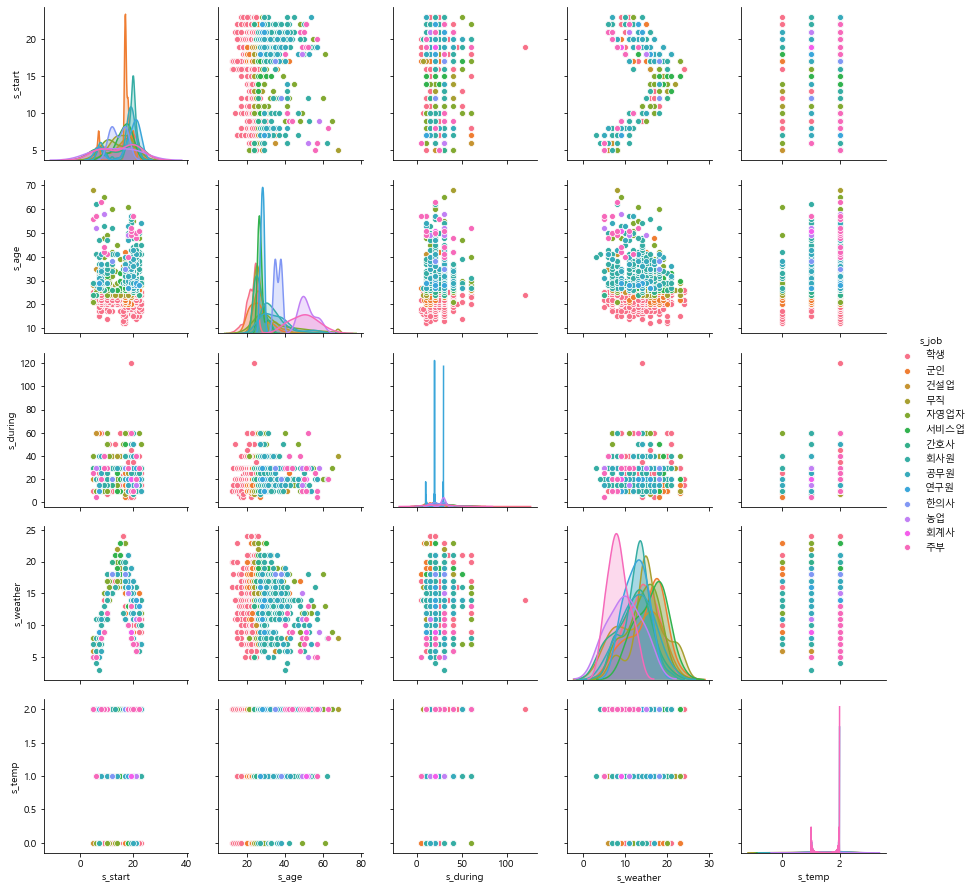

In [34]:
sns.pairplot(data=test_data, vars=['s_start', 's_age', 's_during', 's_weather', 's_temp'], hue='s_job', palette='husl')
plt.savefig('요소들 간의 산점도 그래프.jpg')

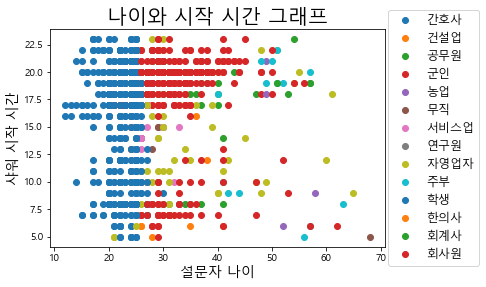

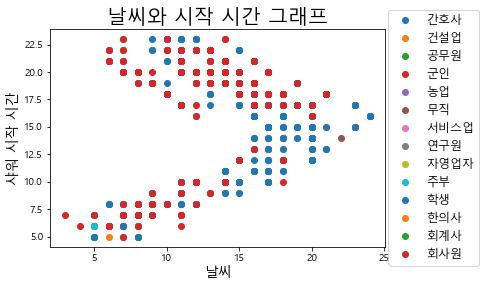

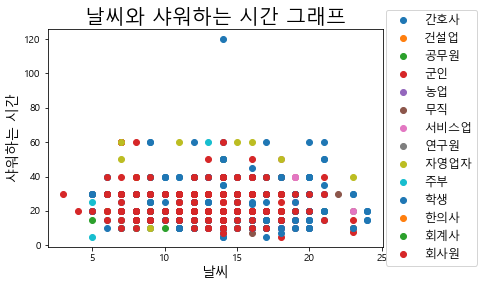

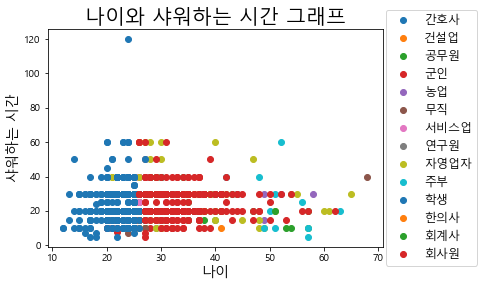

In [35]:
# Scatter plot with a different color by groups

groups = test_data.groupby('s_job')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.s_age, 
            group.s_start, 
            marker='o', 
            linestyle='',
            label=name)

ax.legend(fontsize=12, loc='right', bbox_to_anchor=(1.3, 0.5)) # legend position
plt.title('나이와 시작 시간 그래프', fontsize=20)
plt.xlabel('설문자 나이', fontsize=14)
plt.ylabel('샤워 시작 시간', fontsize=14)
#plt.show()
plt.savefig('나이와 시작 시간 그래프.jpg')

groups = test_data.groupby('s_job')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.s_weather, 
            group.s_start, 
            marker='o', 
            linestyle='',
            label=name)

ax.legend(fontsize=12, loc='right', bbox_to_anchor=(1.3, 0.5)) # legend position
plt.title('날씨와 시작 시간 그래프', fontsize=20)
plt.xlabel('날씨', fontsize=14)
plt.ylabel('샤워 시작 시간', fontsize=14)
#plt.show()
plt.savefig('날씨와 시작 시간 그래프.jpg')

groups = test_data.groupby('s_job')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.s_weather, 
            group.s_during, 
            marker='o', 
            linestyle='',
            label=name)

ax.legend(fontsize=12, loc='right', bbox_to_anchor=(1.3, 0.5)) # legend position
plt.title('날씨와 샤워하는 시간 그래프', fontsize=20)
plt.xlabel('날씨', fontsize=14)
plt.ylabel('샤워하는 시간', fontsize=14)
#plt.show()
plt.savefig('날씨와 샤워하는 시간 그래프.jpg')

groups = test_data.groupby('s_job')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.s_age, 
            group.s_during,  
            
            marker='o', 
            linestyle='',
            label=name)

ax.legend(fontsize=12, loc='right', bbox_to_anchor=(1.3, 0.5)) # legend position
plt.title('나이와 샤워하는 시간 그래프', fontsize=20)
plt.xlabel('나이', fontsize=14)
plt.ylabel('샤워하는 시간', fontsize=14)
#plt.show()
plt.savefig('나이와 샤워하는 시간 그래프.jpg')

In [36]:
groups = test_data.groupby('s_job')

In [37]:
test_data

,s_gender,s_age,s_temp,s_start,s_during,s_perfume,s_job,s_weather
0,0,12,0,16,10,0,학생,16
1,0,12,2,17,10,0,학생,20
2,0,13,0,17,15,0,학생,20
3,0,14,2,21,10,0,학생,14
4,0,14,0,17,20,0,학생,11
5,0,15,1,16,10,0,학생,20
6,0,15,2,20,10,0,학생,11
7,0,15,0,22,10,0,학생,12
8,0,15,2,17,20,1,학생,16
9,0,15,2,21,20,0,학생,14


C:\Users\DaeIn\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


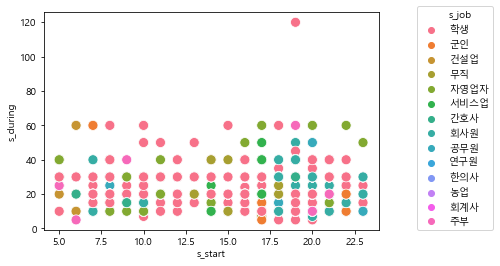

In [38]:
# Scatter plot by Groups

sns.scatterplot(x='s_start', 
                y='s_during', 
                hue='s_job', # different colors by group
                s=100, # marker size,
                data=test_data)

ax = plt.subplot()
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()